# Wine quality parameter analysis 

## Goals:

1. Understand the dataset I am dealing with
2. Test 3 models for wine quality prediction

### 1. Exploratory Data Analysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#### 1. Import data

In [33]:
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('winequality-white.csv', sep=';')

#### 2. Describe datasets

I start by describing the dataset for further investigation of its properties.

In [6]:
df_red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
df_white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Just from having a general overview on the datasets, we undestand:

1. There 11 parameters measured for quality.
2. The average quality is below the median for both wines.

#### 3. Check for Nulls

Checking for null values in the dataset makes part o the standard EDA from Data Science.

In [23]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the values for the red wine dataset are non-null.

In [24]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### 4. Check for duplicates

After confirming there are no Nulls, I follow on verifying if there are duplicates.

In [30]:
print('Number of duplicates =' + ' ' + str(sum(df_red_wine.duplicated())))

Number of duplicates = 240


In [29]:
print('Number of duplicates =' + ' ' + str(sum(df_white_wine.duplicated())))

Number of duplicates = 937


The number of duplicates is:
    
    - 240 for the red wine dataset.
    - 937 for the white wine dataset
    
We will now remove them and re-check.

In [31]:
df_red_wine = df_red_wine[-df_red_wine.duplicated()]

In [32]:
print('Number of duplicates =' + ' ' + str(sum(df_red_wine.duplicated())))

Number of duplicates = 0


In [33]:
df_white_wine = df_white_wine[-df_white_wine.duplicated()]

In [34]:
print('Number of duplicates =' + ' ' + str(sum(df_white_wine.duplicated())))

Number of duplicates = 0


The number of duplicates is now null, so we can proceed the analysis.

#### 5. Plot data distributions

After the standard data verification procedures, I check the data distributions which will support later choices of algorithms for wine quality prediction and understanding which features are more relevant.

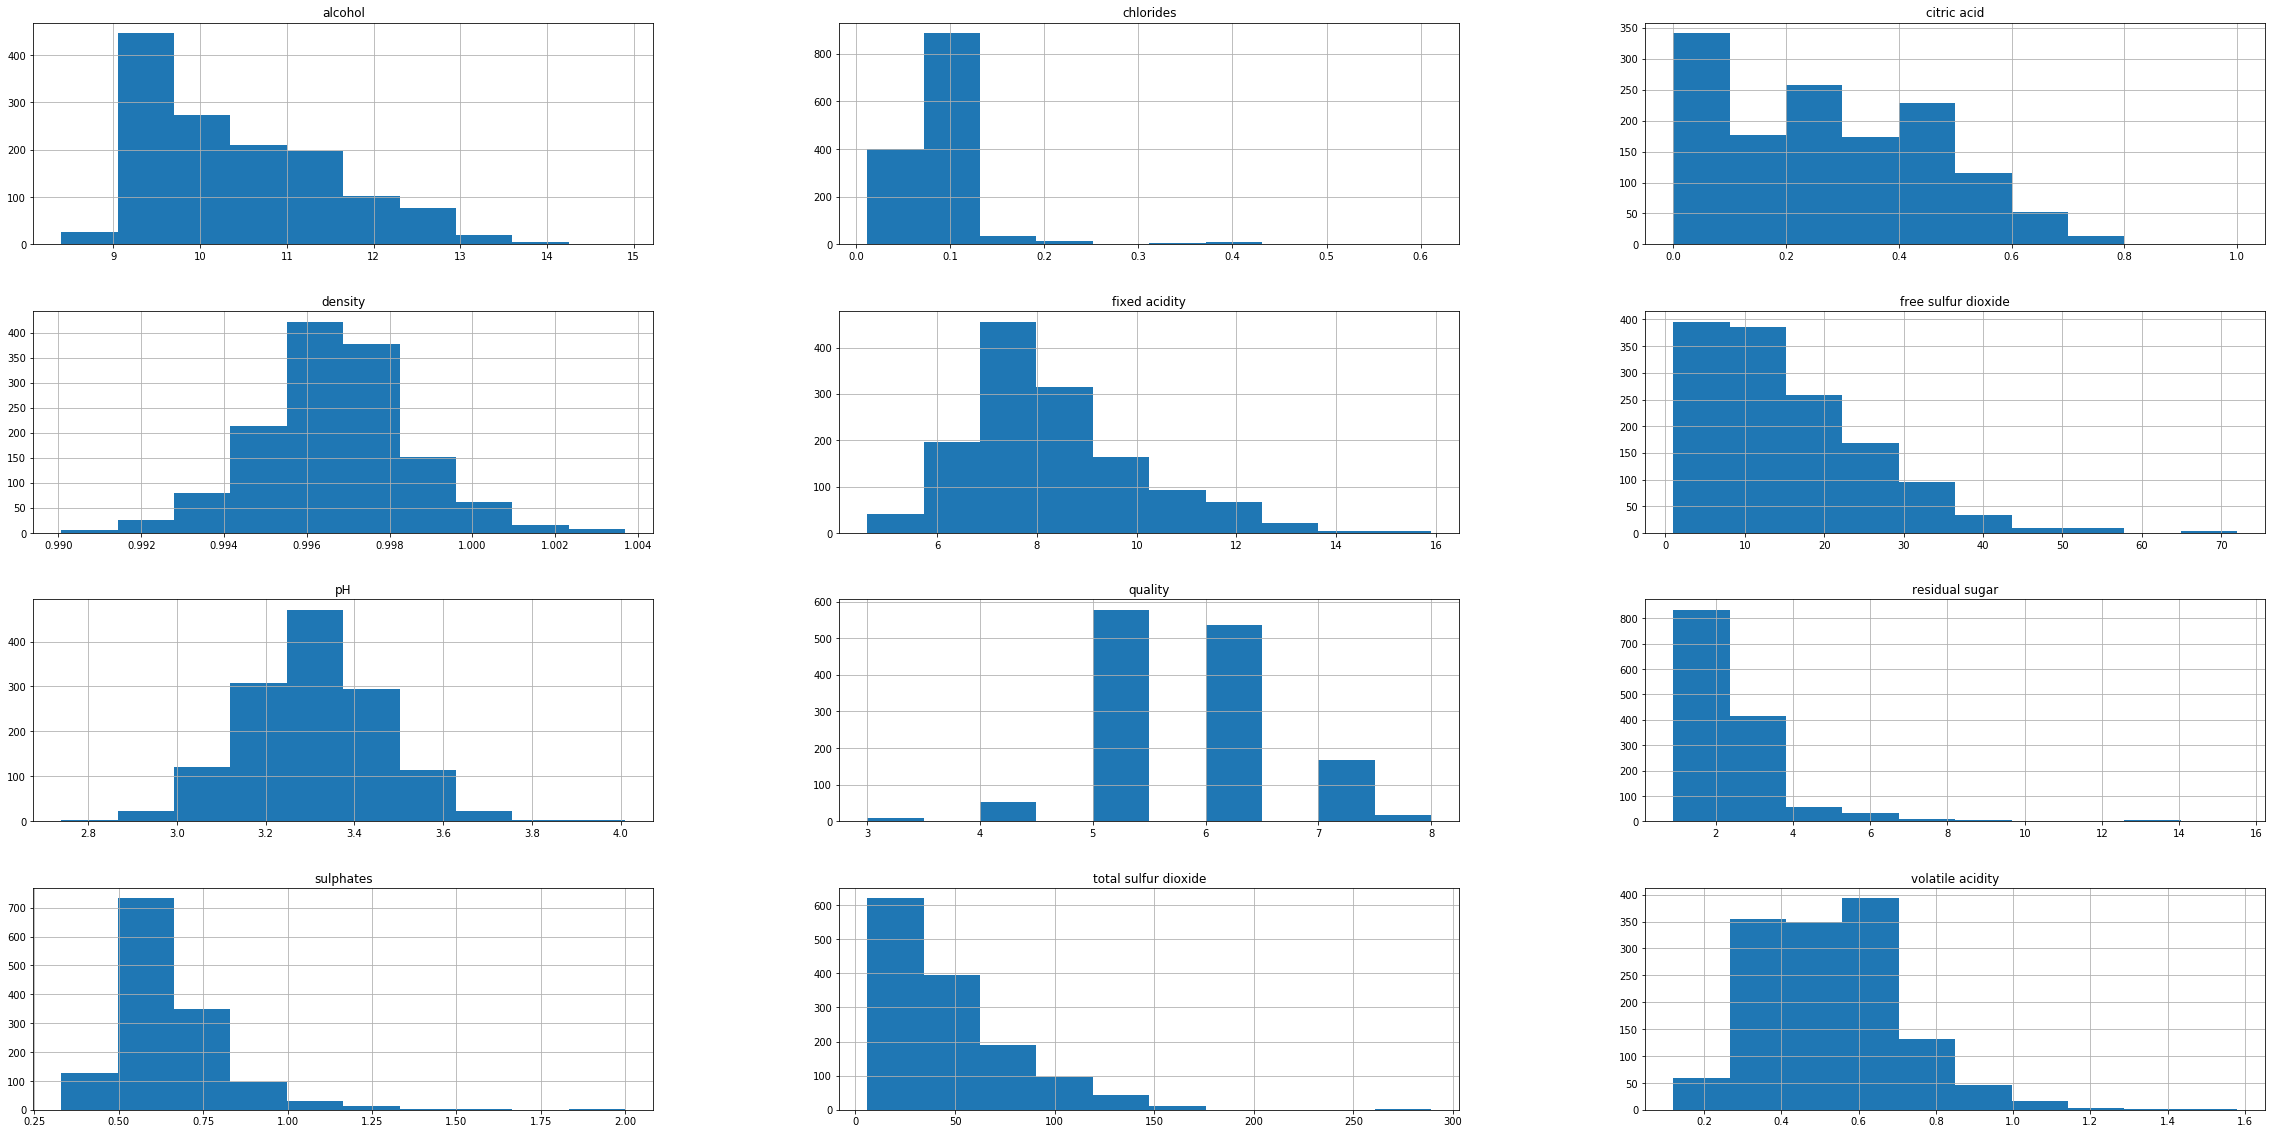

In [35]:
df_red_wine.hist()
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

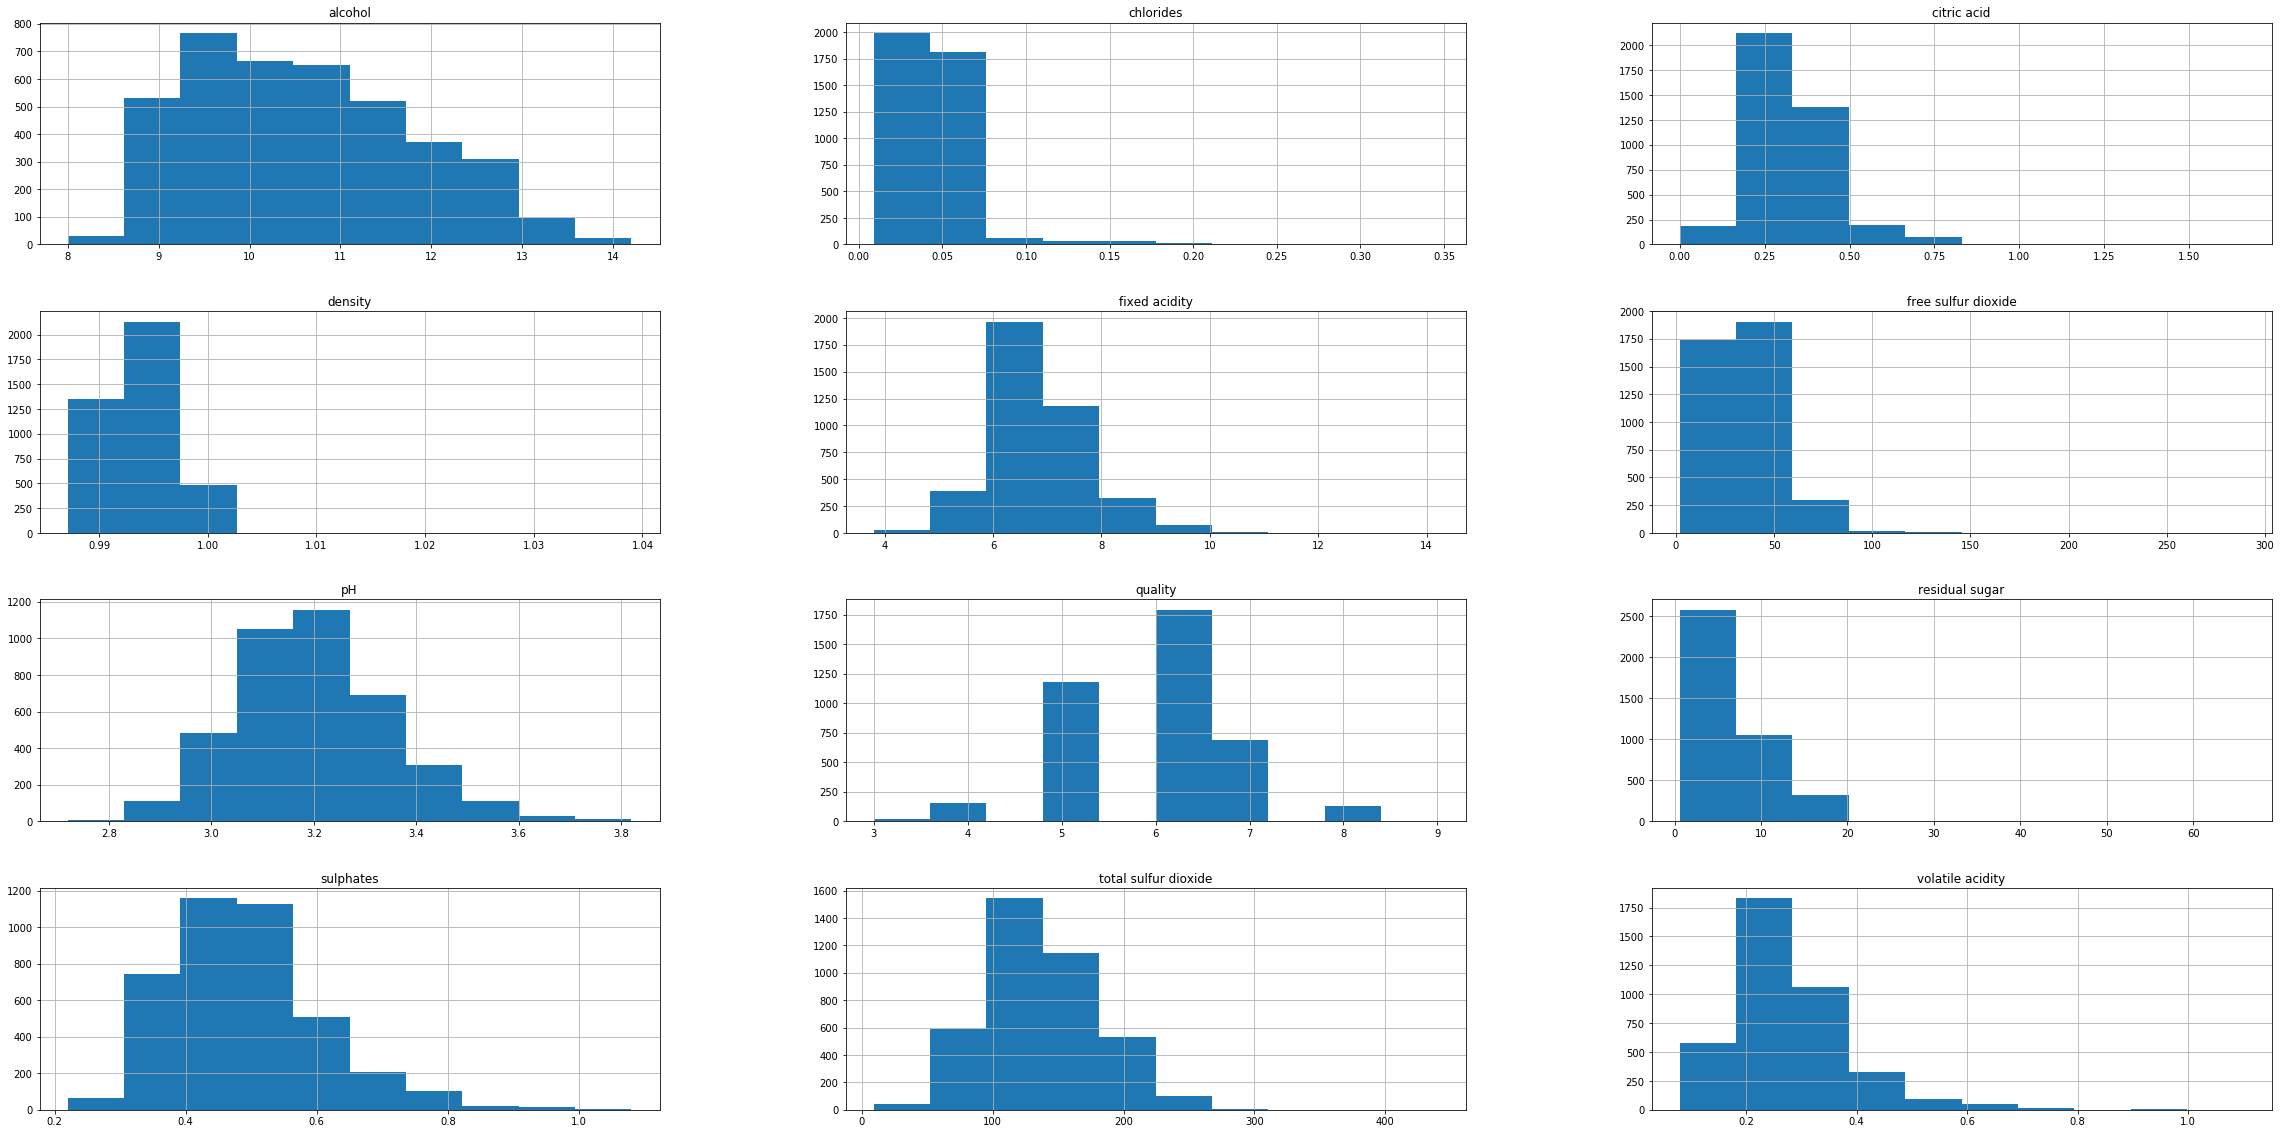

In [36]:
df_white_wine.hist()
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

Looking at the data distributions we can infer two things:

1. The datasets have different distributions for each variable.
2. None of the features has a normal distributions, so I can not use algorithms that make this assumption.

#### 6. Plot auto correlation heatmaps

The auto correlation heatmaps will allow me to understand which features are closer to a linear relation with the wine quality.

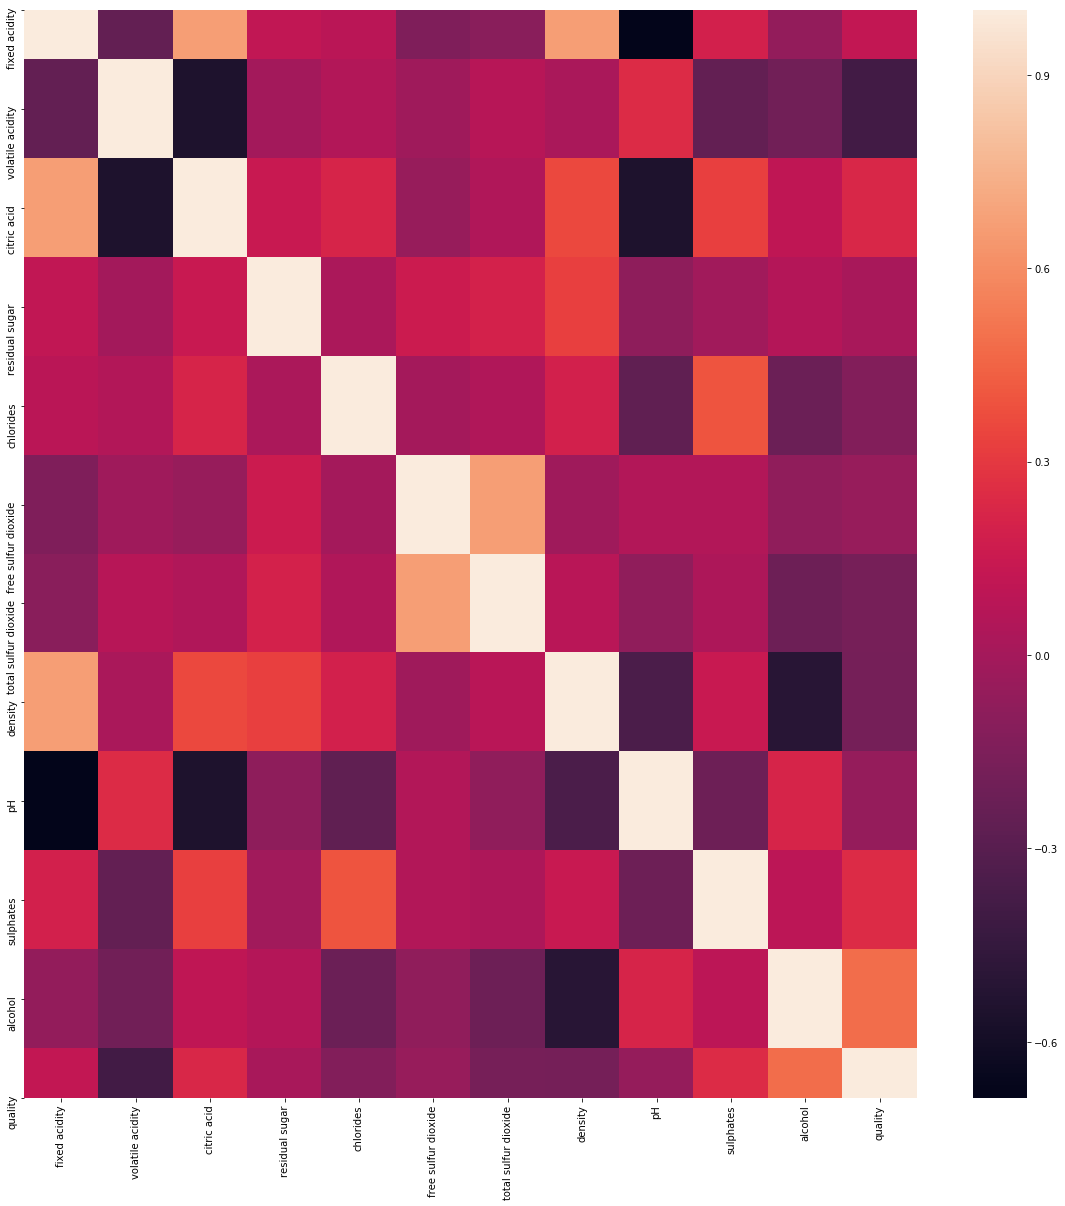

In [50]:
sns.heatmap(df_red_wine.corr())
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In red wines:

1. Quality has a higher correlation with volatile acidity and alcohol.
2. I will check further if this makes sense.

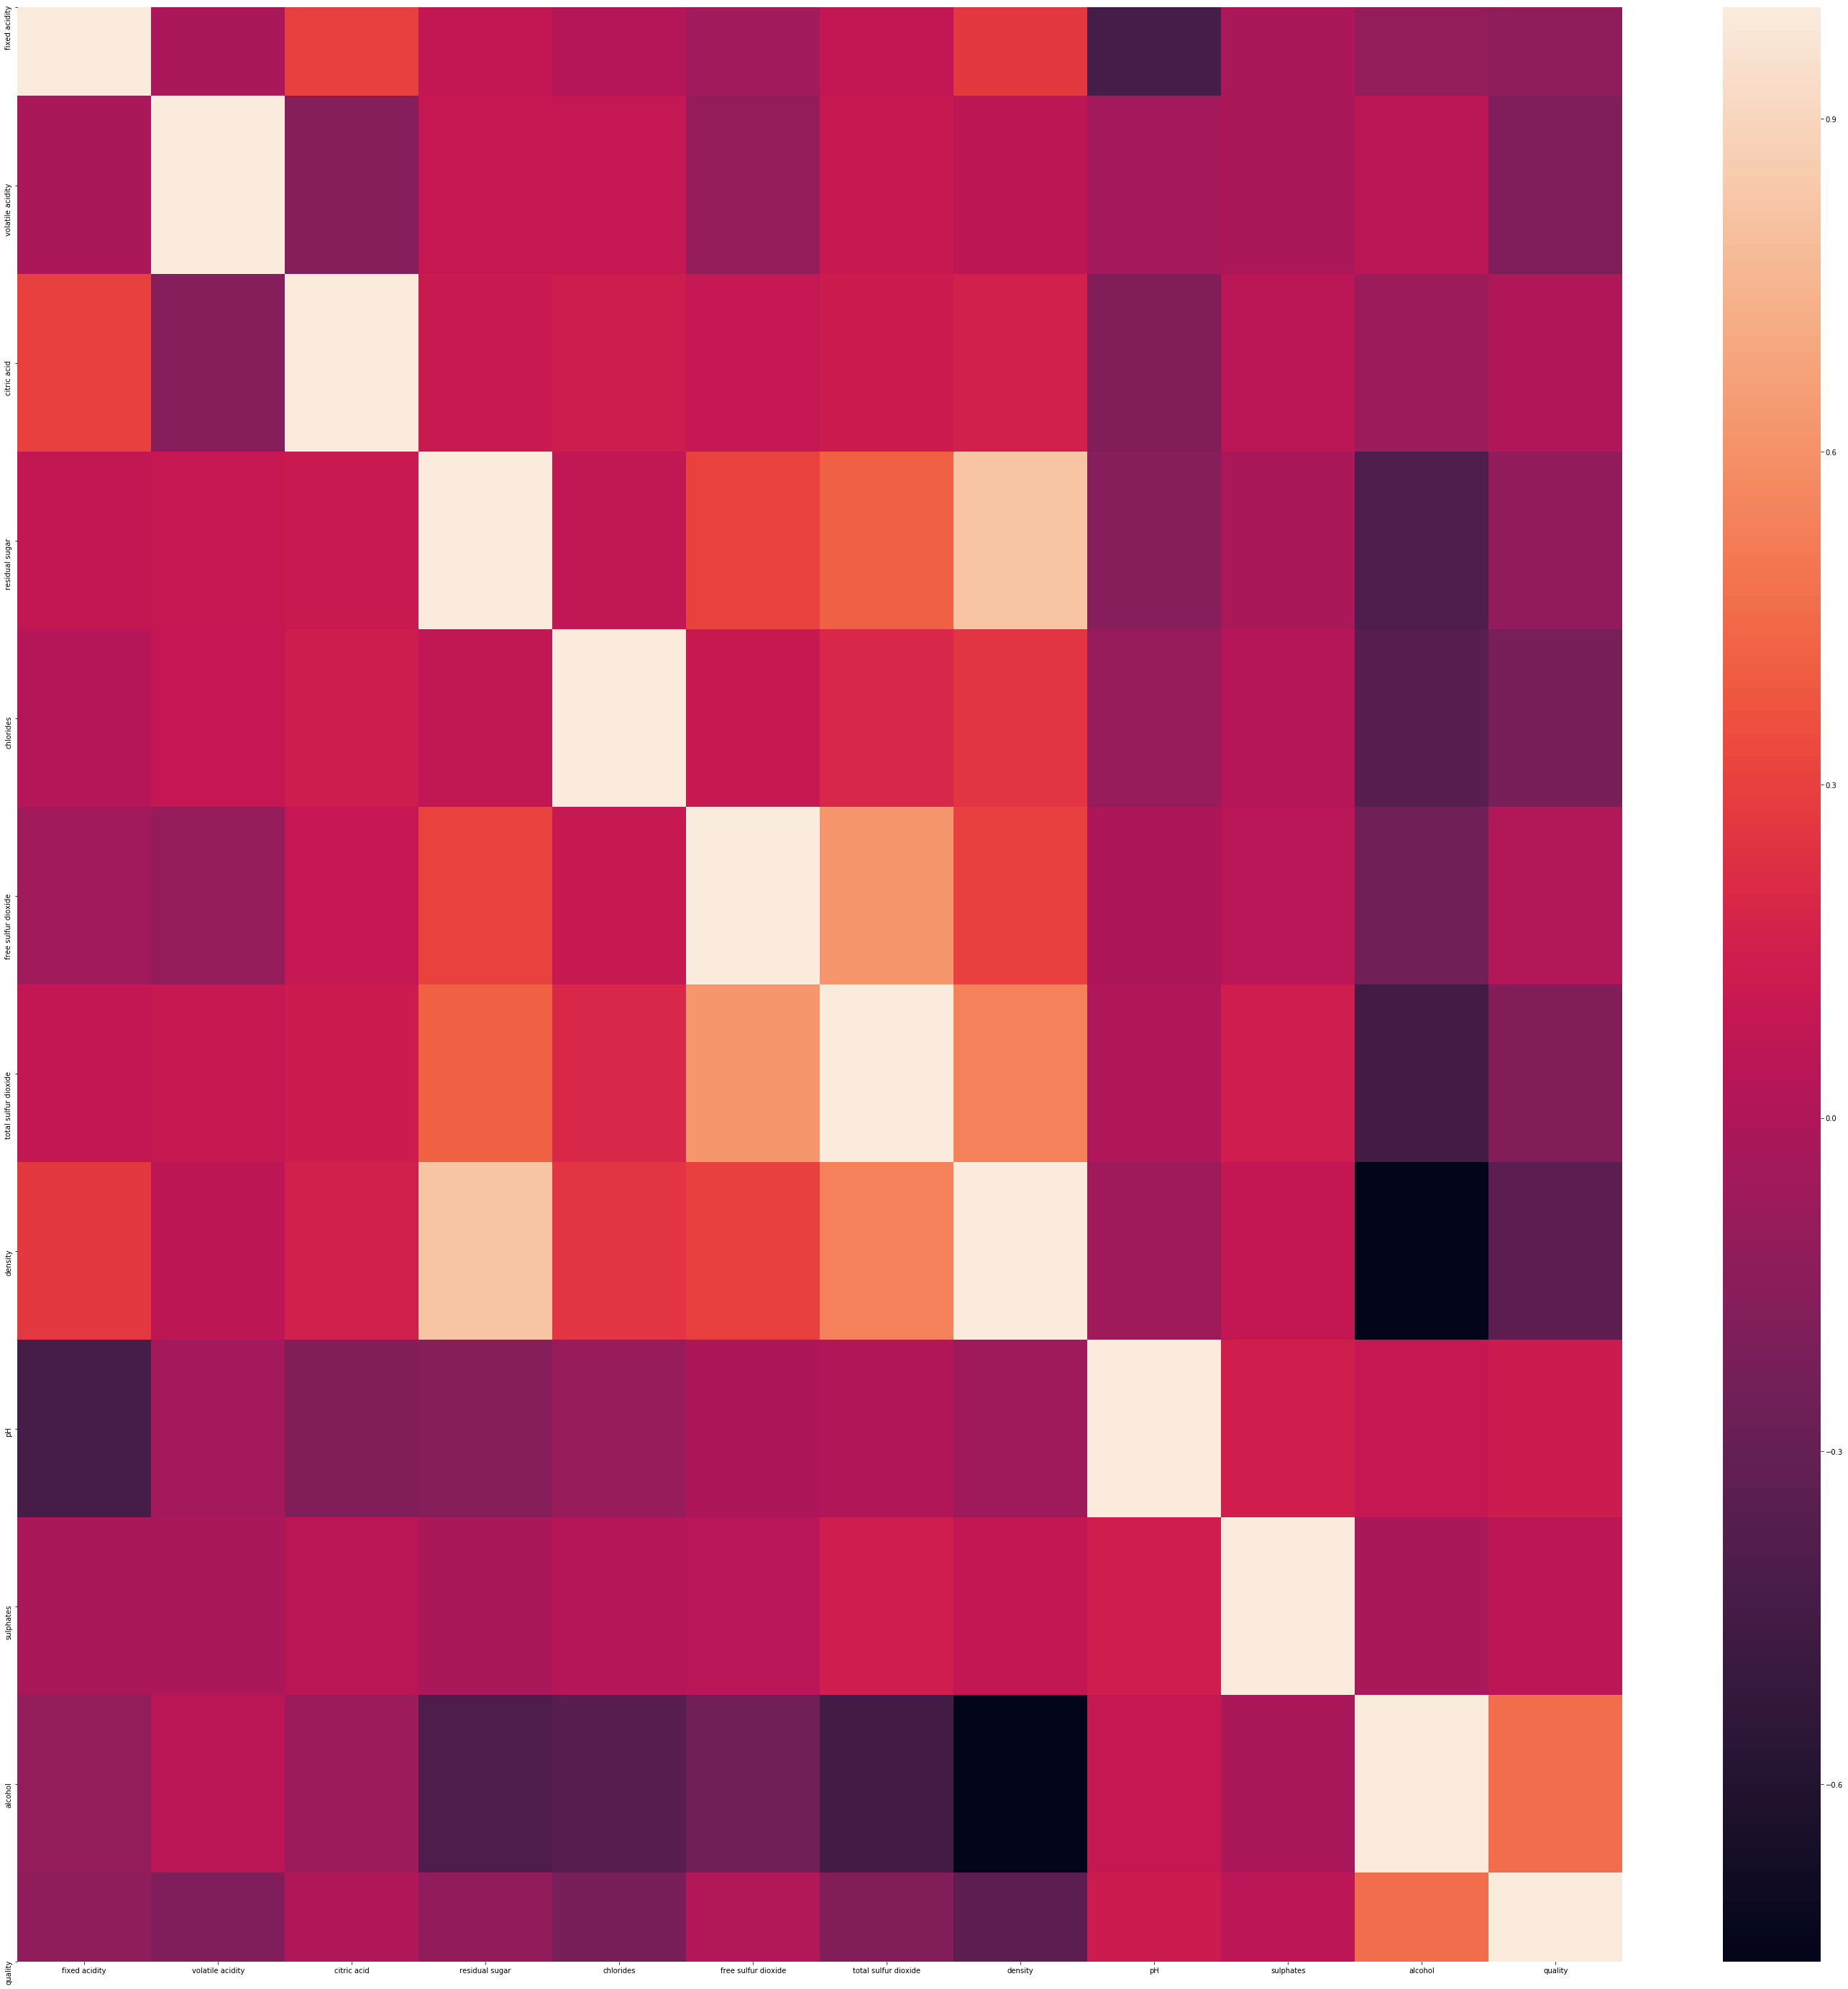

In [51]:
sns.heatmap(df_white_wine.corr())
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In white wines:

1. Quality still has higher correlation with alcohol. Contrary to red wines, there is no high correlation with volatile acidity.
2. Check this alcohol relationship further.

#### 7. Plot Scatter Matrix

The scatter matrix allows me to have a visualiyation of how the different variables related to each other graphically.

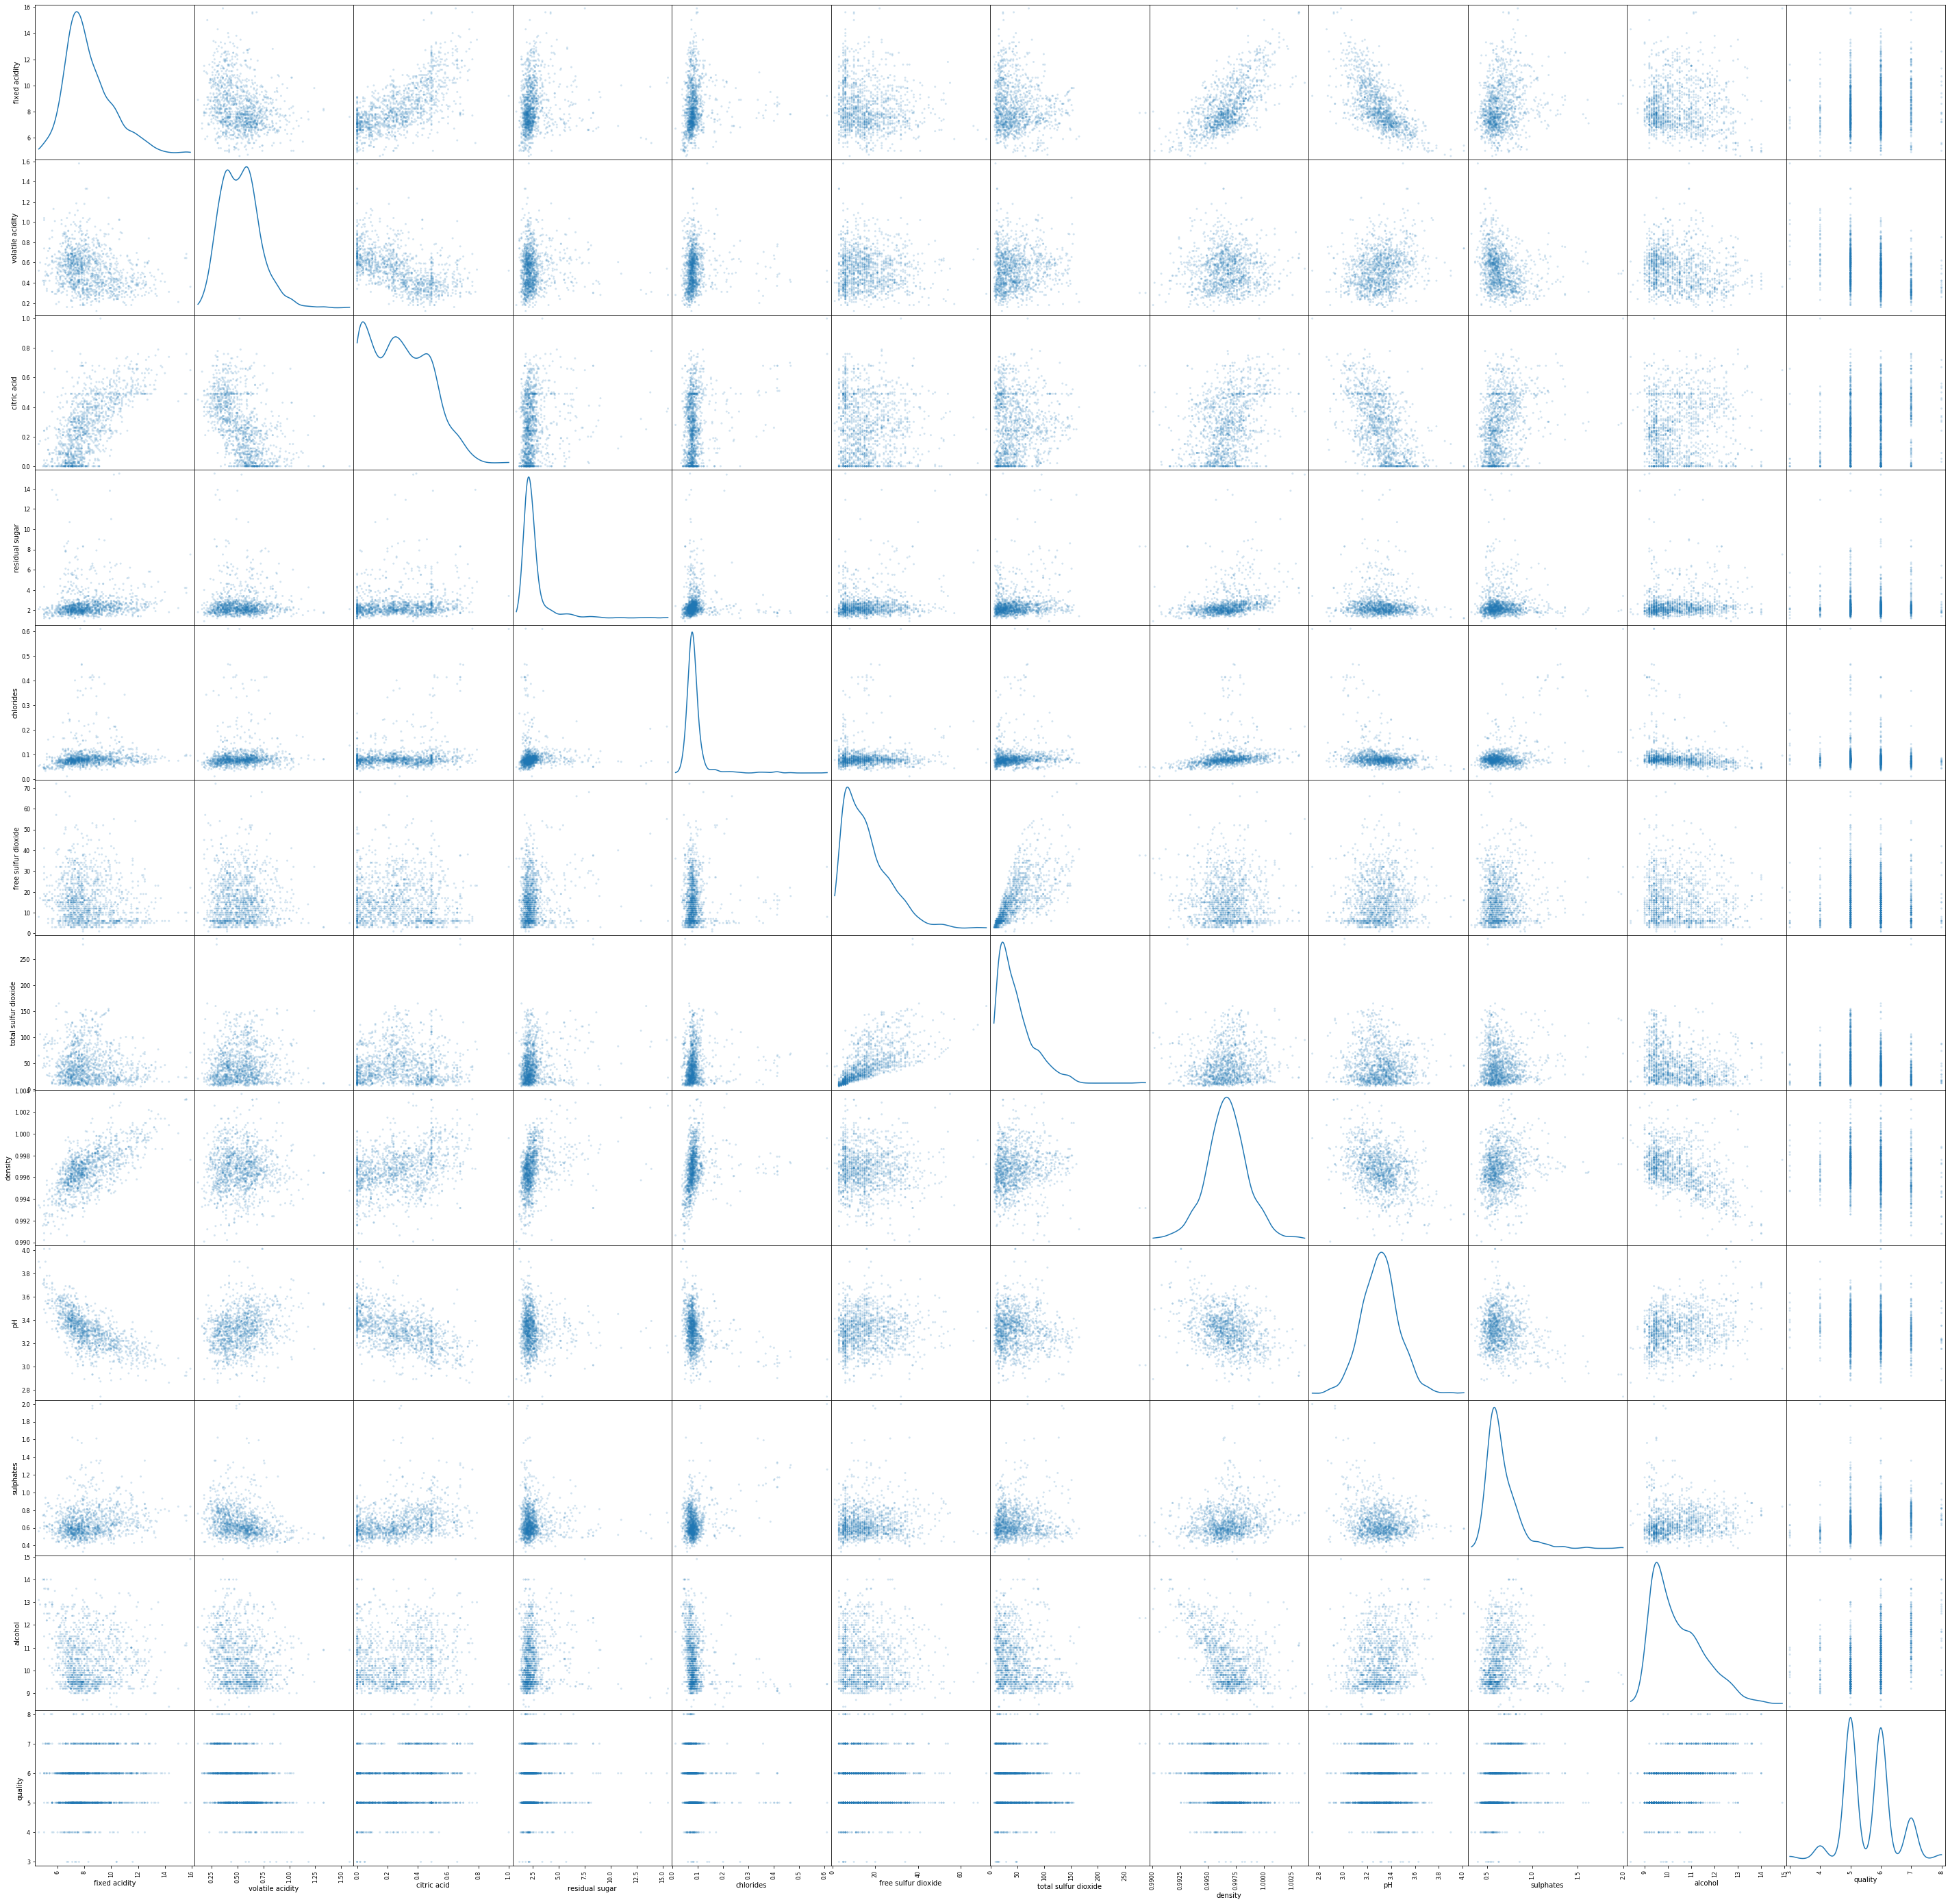

In [57]:
scatter_matrix(df_red_wine, alpha=0.2, diagonal='kde')
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

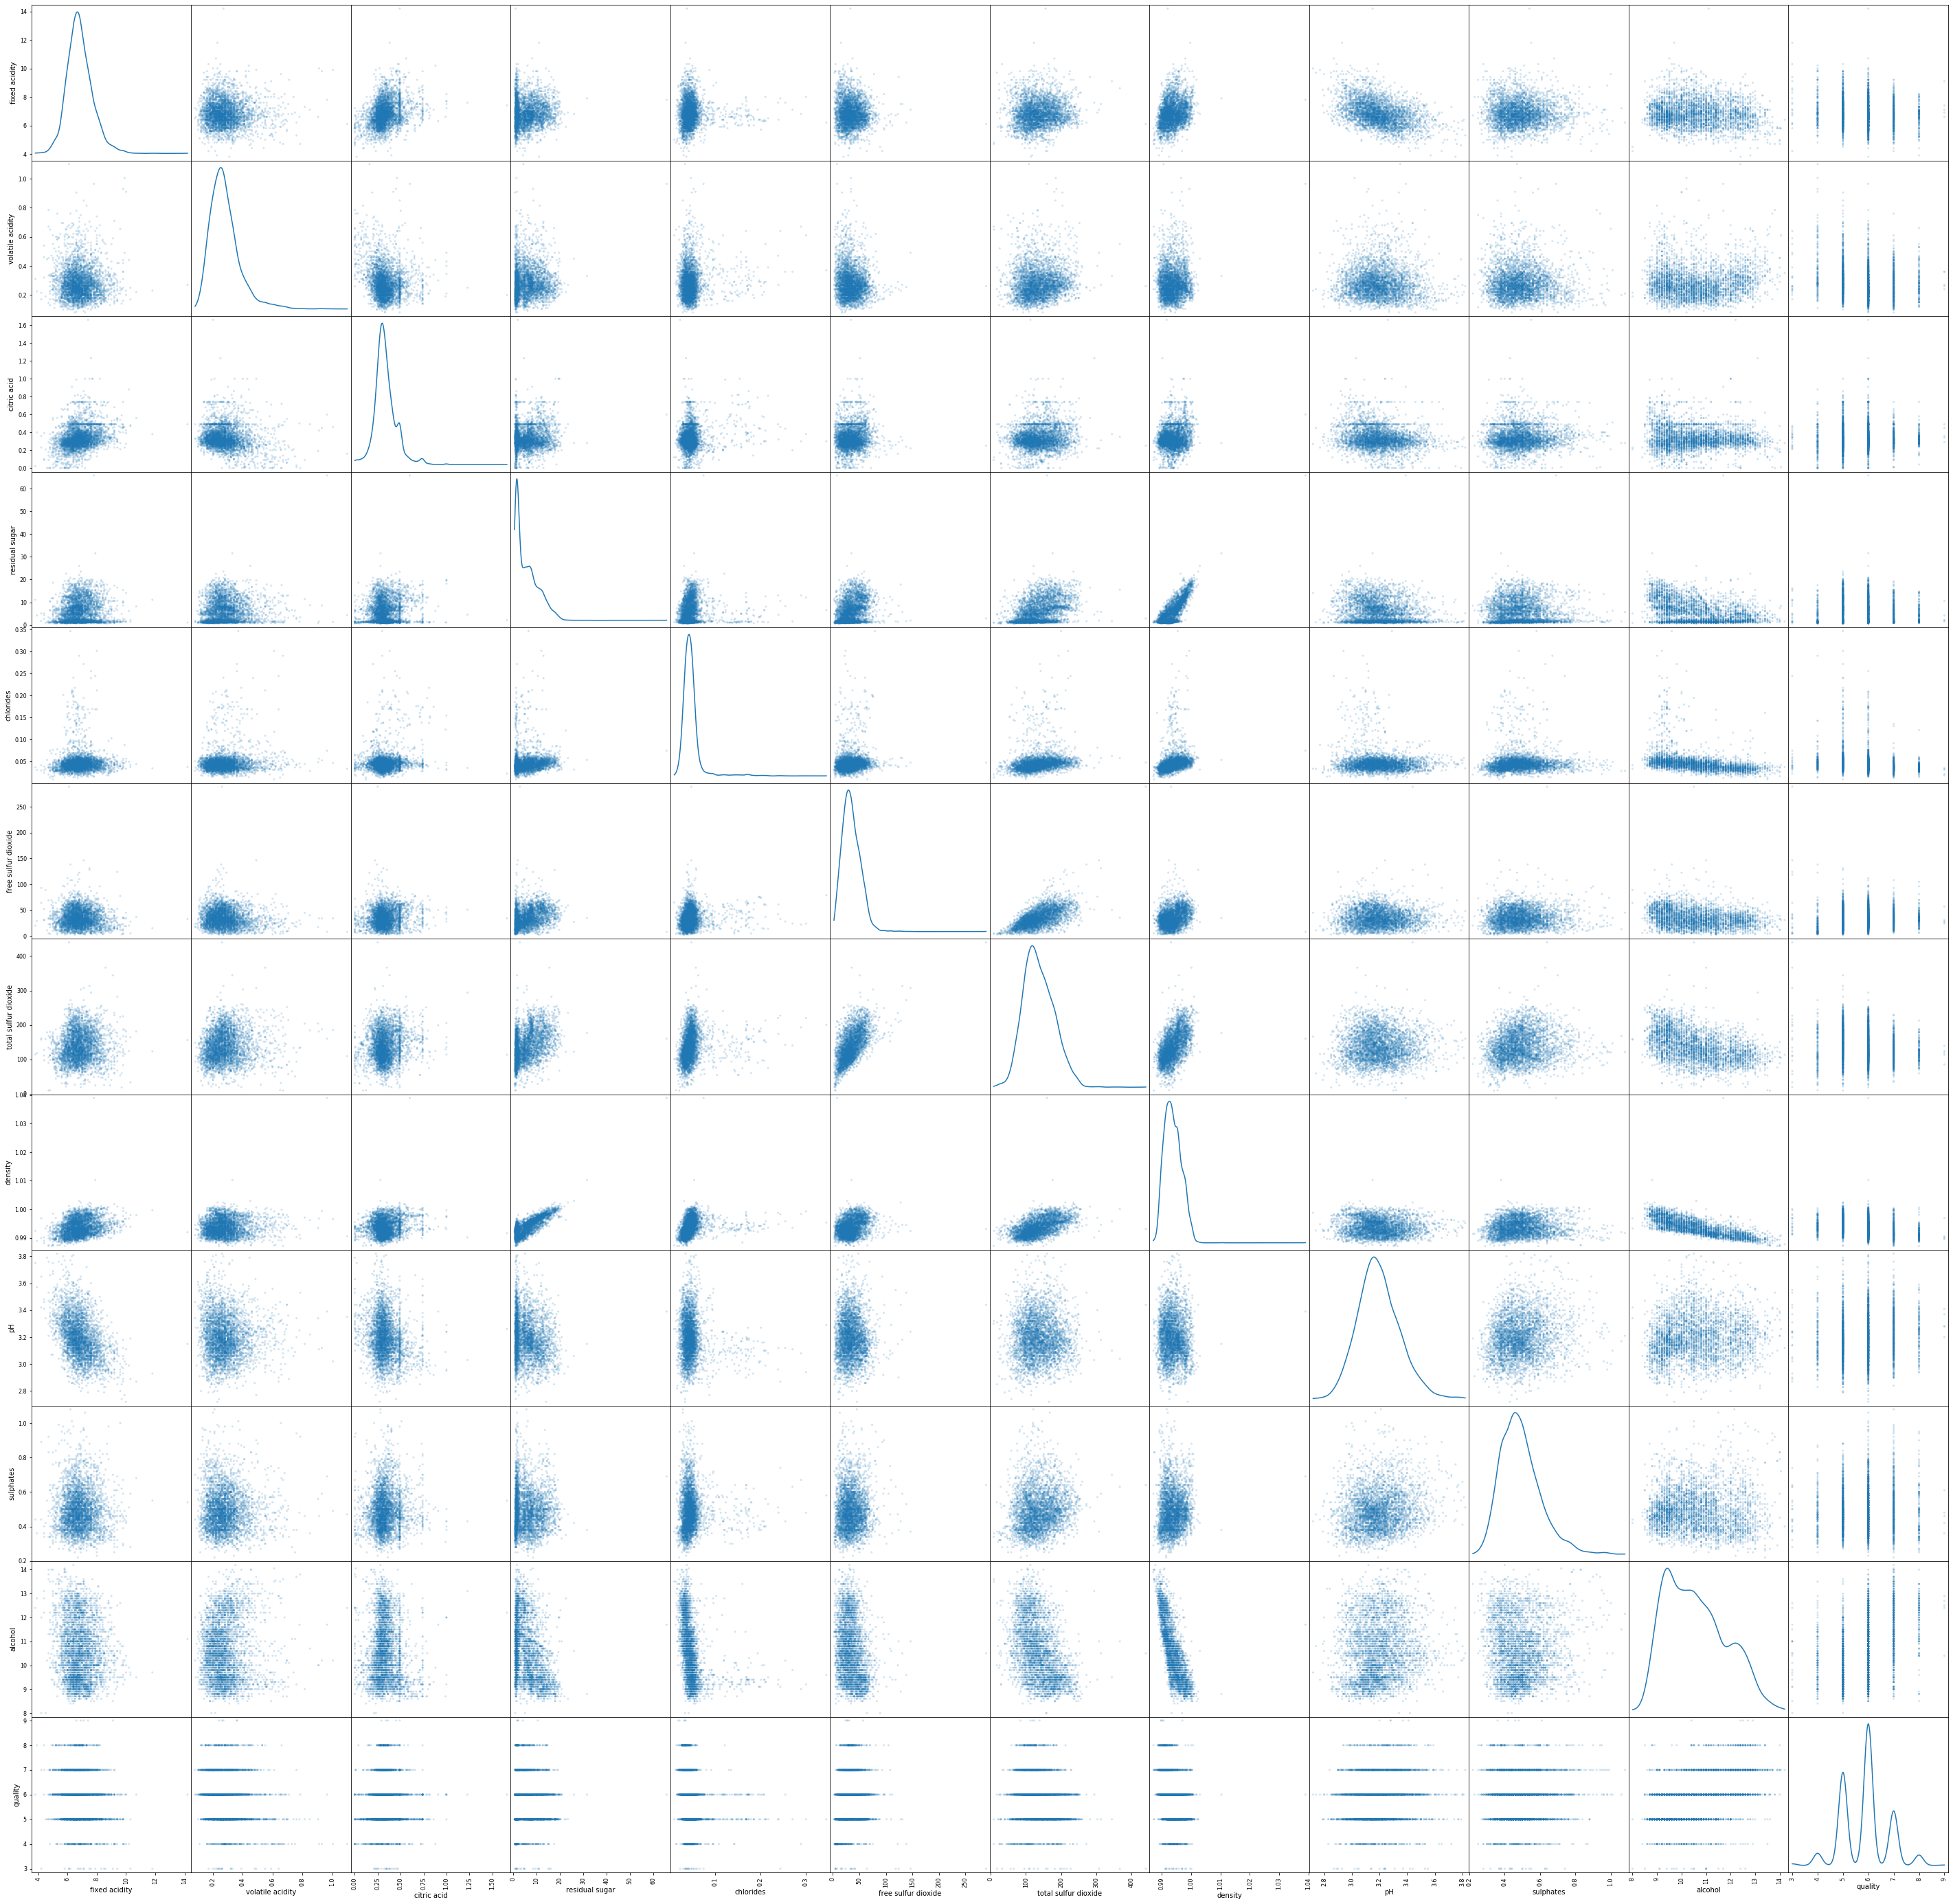

In [56]:
scatter_matrix(df_white_wine, alpha=0.2, diagonal='kde')
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

### 2. Wine Quality Prediction

#### Import libraries

In [10]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

### Red Wine

#### 1. Define features amd target variable

In [34]:
array_red_wine = df_red_wine.values

In [35]:
X_red_wine = array_red_wine[:, :-1]

In [36]:
y_red_wine = array_red_wine[:, -1]

#### 2. Define models to test

In [37]:
lin_reg = LinearRegression()

In [38]:
log_reg = LogisticRegression(solver='liblinear')

In [39]:
random_forest_regressor = RandomForestRegressor()

#### 3. Evaluate models

I calculate the median absolute error for the linear regression:

In [40]:
red_wine_linr_mae = cross_val_score(lin_reg, X_red_wine, y_red_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The red wine Linear Regressor MAE: %.3f +- %3.f' % (mean(red_wine_linr_mae), std(red_wine_linr_mae)))

The red wine Linear Regressor MAE: -0.411 +-   0


I calculate the median absolute error for the logistic regression:

In [41]:
red_wine_lr_mae = cross_val_score(log_reg, X_red_wine, y_red_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The red wine Logistic Regressor MAE: %.3f +- %3.f' % (mean(red_wine_lr_mae), std(red_wine_lr_mae)))

The red wine Logistic Regressor MAE: 0.000 +-   0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


I calculate the median absolute error for the random forest regressor:

In [42]:
red_wine_rf_mae = cross_val_score(random_forest_regressor, X_red_wine, y_red_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The red wine Random Forest Regressor MAE: %.3f +- %3.f' % (mean(red_wine_rf_mae), std(red_wine_rf_mae)))

The red wine Random Forest Regressor MAE: -0.400 +-   0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Looking only at the ability to predict through the MAE, the logistic regression appears as the best model available for the Red Wine dataset.

### White wine

#### 1. Define features and target variable

In [43]:
array_white_wine = df_white_wine.values

In [44]:
X_white_wine = array_white_wine[:, :-1]

In [45]:
y_white_wine = array_white_wine[:, -1]

#### 2. I will use the models from the Red Wine analysis

#### 3. Evaluate models

I calculate the MAE for the white wine dataset, using linear regression:

In [46]:
white_wine_linr_mae = cross_val_score(lin_reg, X_white_wine, y_white_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The white wine Linear Regressor MAE: %.3f +- %3.f' % (mean(white_wine_linr_mae), std(white_wine_linr_mae)))

The white wine Linear Regressor MAE: -0.499 +-   0


I calculate the MAE for the dataset, using logistic regression:

In [49]:
white_wine_lr_mae = cross_val_score(log_reg, X_white_wine, y_white_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The white wine Logistic Regressor MAE: %.3f +- %3.f' % (mean(white_wine_lr_mae), std(white_wine_lr_mae)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The white wine Logistic Regressor MAE: -0.333 +-   0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


I calculate the MAE for the dataset, using a random forest regressor:

In [48]:
white_wine_rf_mae = cross_val_score(random_forest_regressor, X_white_wine, y_white_wine, scoring='neg_median_absolute_error', cv=3, n_jobs=1)

print('The red wine Random Forest Regressor MAE: %.3f +- %3.f' % (mean(white_wine_rf_mae), std(white_wine_rf_mae)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The red wine Random Forest Regressor MAE: -0.500 +-   0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Conclusions

1. For both models, logistic regression appears as the best model according to MAE. It makes sense, due to the size of data and its non-linearity.
2. I could investigate further the quality of models with other metrics such as mean squared error and root squared error. I went for median absolute error, due to possible outliers.
3. To understand which features impact more the prediction, I could look at logistic's regression feature importance.